## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9893023	total: 48.6ms	remaining: 48.5s
1:	learn: 0.9710178	total: 49.7ms	remaining: 24.8s
2:	learn: 0.9516855	total: 50.8ms	remaining: 16.9s
3:	learn: 0.9340198	total: 51.8ms	remaining: 12.9s
4:	learn: 0.9156167	total: 52.9ms	remaining: 10.5s
5:	learn: 0.8980401	total: 53.9ms	remaining: 8.92s
6:	learn: 0.8812986	total: 54.9ms	remaining: 7.78s
7:	learn: 0.8648053	total: 55.8ms	remaining: 6.92s
8:	learn: 0.8493101	total: 56.9ms	remaining: 6.26s
9:	learn: 0.8326108	total: 57.8ms	remaining: 5.72s
10:	learn: 0.8157449	total: 58.8ms	remaining: 5.29s
11:	learn: 0.8013969	total: 59.8ms	remaining: 4.93s
12:	learn: 0.7860443	total: 60.8ms	remaining: 4.61s
13:	learn: 0.7703640	total: 61.8ms	remaining: 4.35s
14:	learn: 0.7577769	total: 62.8ms	remaining: 4.12s
15:	learn: 0.7447580	total: 63.7ms	remaining: 3.92s
16:	learn: 0.7331329	total: 64.7ms	remaining: 3.74s
17:	learn: 0.7204847	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7080060	total: 66.7ms	remaining:

90:	learn: 0.3268413	total: 141ms	remaining: 1.41s
91:	learn: 0.3252821	total: 142ms	remaining: 1.4s
92:	learn: 0.3235797	total: 143ms	remaining: 1.4s
93:	learn: 0.3216141	total: 147ms	remaining: 1.41s
94:	learn: 0.3192881	total: 148ms	remaining: 1.41s
95:	learn: 0.3179551	total: 149ms	remaining: 1.4s
96:	learn: 0.3167188	total: 150ms	remaining: 1.4s
97:	learn: 0.3148721	total: 151ms	remaining: 1.39s
98:	learn: 0.3134143	total: 152ms	remaining: 1.38s
99:	learn: 0.3118003	total: 153ms	remaining: 1.38s
100:	learn: 0.3098963	total: 154ms	remaining: 1.37s
101:	learn: 0.3080794	total: 155ms	remaining: 1.36s
102:	learn: 0.3067345	total: 156ms	remaining: 1.36s
103:	learn: 0.3051758	total: 157ms	remaining: 1.35s
104:	learn: 0.3037924	total: 158ms	remaining: 1.35s
105:	learn: 0.3022648	total: 159ms	remaining: 1.34s
106:	learn: 0.3008432	total: 160ms	remaining: 1.34s
107:	learn: 0.2994795	total: 161ms	remaining: 1.33s
108:	learn: 0.2982824	total: 162ms	remaining: 1.32s
109:	learn: 0.2971930	tota

210:	learn: 0.2126202	total: 275ms	remaining: 1.03s
211:	learn: 0.2122207	total: 276ms	remaining: 1.03s
212:	learn: 0.2114923	total: 277ms	remaining: 1.02s
213:	learn: 0.2109301	total: 278ms	remaining: 1.02s
214:	learn: 0.2103067	total: 279ms	remaining: 1.02s
215:	learn: 0.2097253	total: 281ms	remaining: 1.02s
216:	learn: 0.2092615	total: 282ms	remaining: 1.01s
217:	learn: 0.2086071	total: 282ms	remaining: 1.01s
218:	learn: 0.2080226	total: 283ms	remaining: 1.01s
219:	learn: 0.2076275	total: 284ms	remaining: 1.01s
220:	learn: 0.2072194	total: 286ms	remaining: 1.01s
221:	learn: 0.2066437	total: 287ms	remaining: 1s
222:	learn: 0.2059688	total: 288ms	remaining: 1s
223:	learn: 0.2055024	total: 289ms	remaining: 1s
224:	learn: 0.2049774	total: 290ms	remaining: 998ms
225:	learn: 0.2044118	total: 291ms	remaining: 996ms
226:	learn: 0.2040000	total: 292ms	remaining: 994ms
227:	learn: 0.2037548	total: 293ms	remaining: 992ms
228:	learn: 0.2031879	total: 294ms	remaining: 990ms
229:	learn: 0.2025196

342:	learn: 0.1619290	total: 411ms	remaining: 788ms
343:	learn: 0.1615216	total: 413ms	remaining: 787ms
344:	learn: 0.1613003	total: 414ms	remaining: 785ms
345:	learn: 0.1611967	total: 415ms	remaining: 784ms
346:	learn: 0.1610595	total: 416ms	remaining: 782ms
347:	learn: 0.1606251	total: 417ms	remaining: 781ms
348:	learn: 0.1602530	total: 418ms	remaining: 780ms
349:	learn: 0.1598138	total: 419ms	remaining: 778ms
350:	learn: 0.1594968	total: 420ms	remaining: 777ms
351:	learn: 0.1590173	total: 421ms	remaining: 775ms
352:	learn: 0.1588949	total: 422ms	remaining: 774ms
353:	learn: 0.1585631	total: 423ms	remaining: 772ms
354:	learn: 0.1582124	total: 424ms	remaining: 771ms
355:	learn: 0.1579243	total: 425ms	remaining: 769ms
356:	learn: 0.1574165	total: 426ms	remaining: 768ms
357:	learn: 0.1573306	total: 428ms	remaining: 767ms
358:	learn: 0.1569775	total: 429ms	remaining: 765ms
359:	learn: 0.1565274	total: 430ms	remaining: 764ms
360:	learn: 0.1563790	total: 431ms	remaining: 762ms
361:	learn: 

472:	learn: 0.1256937	total: 547ms	remaining: 609ms
473:	learn: 0.1253335	total: 548ms	remaining: 608ms
474:	learn: 0.1251222	total: 549ms	remaining: 607ms
475:	learn: 0.1249288	total: 550ms	remaining: 606ms
476:	learn: 0.1246303	total: 551ms	remaining: 605ms
477:	learn: 0.1244161	total: 552ms	remaining: 603ms
478:	learn: 0.1241512	total: 553ms	remaining: 602ms
479:	learn: 0.1238614	total: 554ms	remaining: 601ms
480:	learn: 0.1237662	total: 555ms	remaining: 599ms
481:	learn: 0.1236817	total: 556ms	remaining: 598ms
482:	learn: 0.1234041	total: 557ms	remaining: 597ms
483:	learn: 0.1231329	total: 558ms	remaining: 595ms
484:	learn: 0.1228761	total: 559ms	remaining: 594ms
485:	learn: 0.1224875	total: 560ms	remaining: 593ms
486:	learn: 0.1222925	total: 561ms	remaining: 591ms
487:	learn: 0.1219919	total: 563ms	remaining: 590ms
488:	learn: 0.1216781	total: 564ms	remaining: 589ms
489:	learn: 0.1214385	total: 565ms	remaining: 588ms
490:	learn: 0.1211728	total: 566ms	remaining: 587ms
491:	learn: 

602:	learn: 0.0985688	total: 683ms	remaining: 450ms
603:	learn: 0.0983776	total: 685ms	remaining: 449ms
604:	learn: 0.0982084	total: 686ms	remaining: 448ms
605:	learn: 0.0980283	total: 687ms	remaining: 446ms
606:	learn: 0.0978626	total: 688ms	remaining: 445ms
607:	learn: 0.0976427	total: 689ms	remaining: 444ms
608:	learn: 0.0974335	total: 690ms	remaining: 443ms
609:	learn: 0.0972638	total: 691ms	remaining: 442ms
610:	learn: 0.0970857	total: 692ms	remaining: 440ms
611:	learn: 0.0969147	total: 693ms	remaining: 439ms
612:	learn: 0.0967354	total: 694ms	remaining: 438ms
613:	learn: 0.0966192	total: 695ms	remaining: 437ms
614:	learn: 0.0964310	total: 696ms	remaining: 436ms
615:	learn: 0.0962710	total: 697ms	remaining: 435ms
616:	learn: 0.0960407	total: 698ms	remaining: 433ms
617:	learn: 0.0957772	total: 699ms	remaining: 432ms
618:	learn: 0.0956334	total: 700ms	remaining: 431ms
619:	learn: 0.0954710	total: 701ms	remaining: 430ms
620:	learn: 0.0953283	total: 702ms	remaining: 429ms
621:	learn: 

732:	learn: 0.0800469	total: 818ms	remaining: 298ms
733:	learn: 0.0798286	total: 819ms	remaining: 297ms
734:	learn: 0.0796695	total: 820ms	remaining: 296ms
735:	learn: 0.0795770	total: 821ms	remaining: 295ms
736:	learn: 0.0795051	total: 822ms	remaining: 293ms
737:	learn: 0.0794318	total: 823ms	remaining: 292ms
738:	learn: 0.0793119	total: 824ms	remaining: 291ms
739:	learn: 0.0792592	total: 826ms	remaining: 290ms
740:	learn: 0.0791797	total: 827ms	remaining: 289ms
741:	learn: 0.0791198	total: 828ms	remaining: 288ms
742:	learn: 0.0790223	total: 829ms	remaining: 287ms
743:	learn: 0.0788772	total: 830ms	remaining: 286ms
744:	learn: 0.0787792	total: 831ms	remaining: 285ms
745:	learn: 0.0786299	total: 832ms	remaining: 283ms
746:	learn: 0.0784980	total: 833ms	remaining: 282ms
747:	learn: 0.0784009	total: 834ms	remaining: 281ms
748:	learn: 0.0782202	total: 835ms	remaining: 280ms
749:	learn: 0.0780897	total: 836ms	remaining: 279ms
750:	learn: 0.0780254	total: 837ms	remaining: 278ms
751:	learn: 

857:	learn: 0.0672486	total: 950ms	remaining: 157ms
858:	learn: 0.0671328	total: 951ms	remaining: 156ms
859:	learn: 0.0671101	total: 953ms	remaining: 155ms
860:	learn: 0.0670878	total: 954ms	remaining: 154ms
861:	learn: 0.0670640	total: 955ms	remaining: 153ms
862:	learn: 0.0669048	total: 956ms	remaining: 152ms
863:	learn: 0.0667877	total: 957ms	remaining: 151ms
864:	learn: 0.0667434	total: 958ms	remaining: 149ms
865:	learn: 0.0666581	total: 959ms	remaining: 148ms
866:	learn: 0.0665432	total: 960ms	remaining: 147ms
867:	learn: 0.0664408	total: 961ms	remaining: 146ms
868:	learn: 0.0663304	total: 962ms	remaining: 145ms
869:	learn: 0.0662524	total: 963ms	remaining: 144ms
870:	learn: 0.0662134	total: 964ms	remaining: 143ms
871:	learn: 0.0661186	total: 965ms	remaining: 142ms
872:	learn: 0.0660507	total: 966ms	remaining: 141ms
873:	learn: 0.0659932	total: 967ms	remaining: 139ms
874:	learn: 0.0658605	total: 968ms	remaining: 138ms
875:	learn: 0.0658420	total: 969ms	remaining: 137ms
876:	learn: 

989:	learn: 0.0580153	total: 1.08s	remaining: 10.9ms
990:	learn: 0.0579870	total: 1.08s	remaining: 9.85ms
991:	learn: 0.0578329	total: 1.09s	remaining: 8.76ms
992:	learn: 0.0578208	total: 1.09s	remaining: 7.66ms
993:	learn: 0.0578104	total: 1.09s	remaining: 6.57ms
994:	learn: 0.0577506	total: 1.09s	remaining: 5.47ms
995:	learn: 0.0577050	total: 1.09s	remaining: 4.38ms
996:	learn: 0.0575828	total: 1.09s	remaining: 3.28ms
997:	learn: 0.0575405	total: 1.09s	remaining: 2.19ms
998:	learn: 0.0574833	total: 1.09s	remaining: 1.09ms
999:	learn: 0.0574422	total: 1.09s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

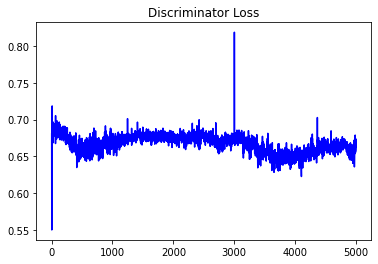

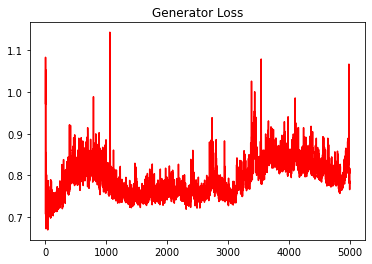

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

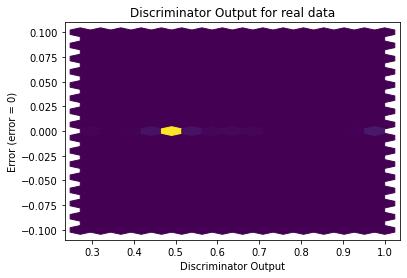

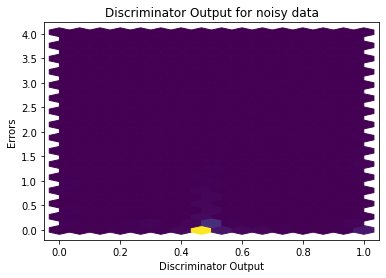

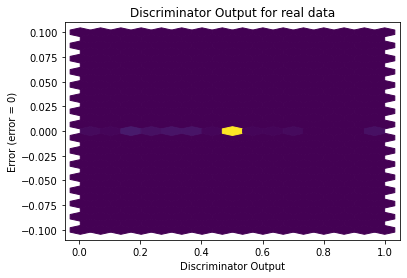

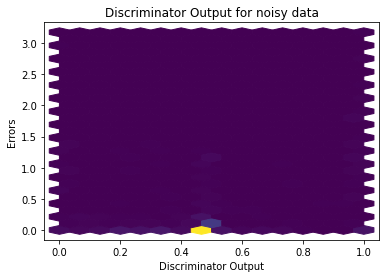

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


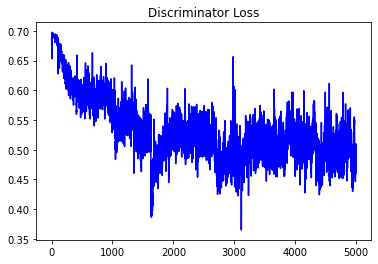

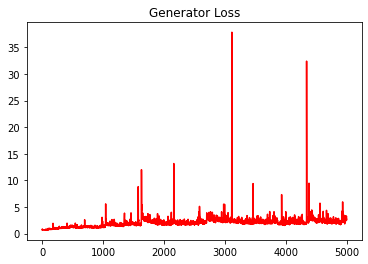

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

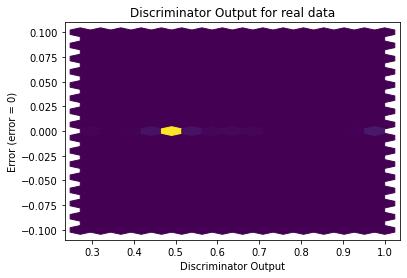

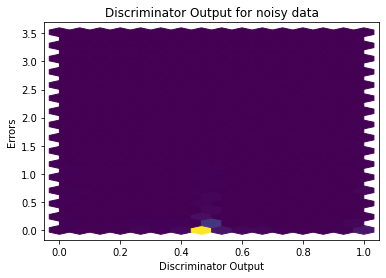

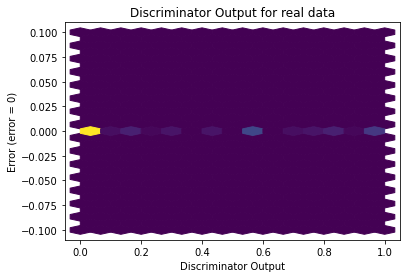

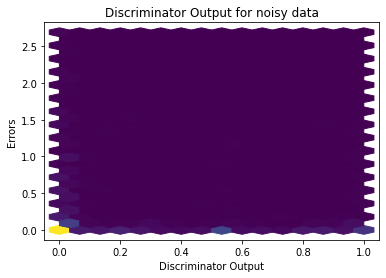

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[1.]], device='cuda:0', requires_grad=True)
